# **Setup**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import precision_score as prec_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Deep Learning/Projects/6K Car Price Regression/data.csv")

# _Data View Dirty_

In [3]:
df.head()

,0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5,0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5,0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7,0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5,0,17.74


# **Data Cleaning & EDA**

In [4]:
df.head()

,0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5,0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5,0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7,0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5,0,17.74


In [5]:
# No Need for Unnamed: 0 as it is a duplicate for the index column
df.drop("0", axis=1, inplace=True)

In [6]:
df['Name'] = df['Name'].apply(lambda x: x.split(" ")[0])

In [7]:
# There are too many values to convert in a dummy variable, select the top cars
df['Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Isuzu               1
Lamborghini         1
Ambassador          1
Bentley             1
Name: Name, dtype: int64

In [8]:
df = df[(df['Name']=="Maruti") | (df['Name']=="Hyundai") | (df['Name']=="Honda") | (df['Name']=="Toyota") | (df['Name']=="Mercedes-Benz")]

In [9]:
df = pd.concat([df, pd.get_dummies(df['Name'], drop_first=True)], axis=1)

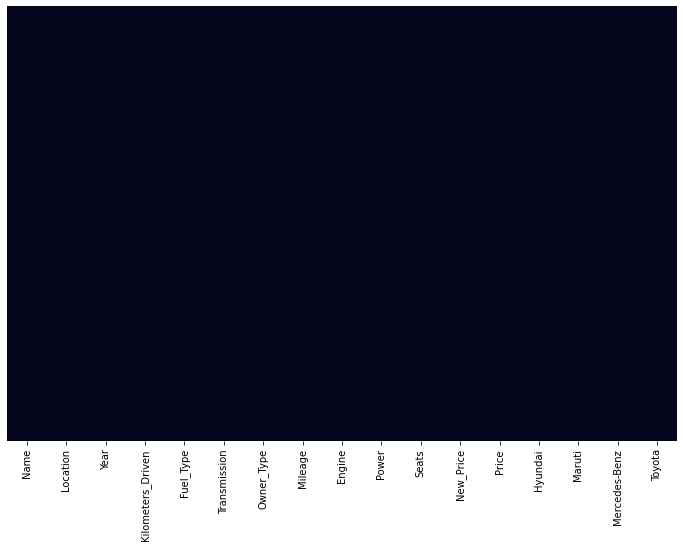

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [11]:
# There are too many NaN values in the "New_Price" Column, lets drop it
df.drop("New_Price", axis=1, inplace=True)

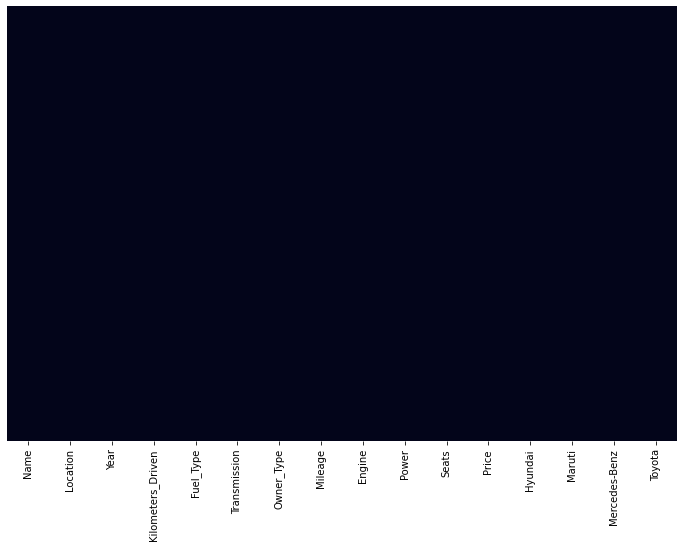

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [13]:
# Let's drop other values, as they account only 1.25 Percent of the data
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Hyundai              0
Maruti               0
Mercedes-Benz        0
Toyota               0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Hyundai              0
Maruti               0
Mercedes-Benz        0
Toyota               0
dtype: int64

In [16]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5,1.75,0,1,0,0
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5,12.50,1,0,0,0
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5,4.50,0,0,0,0
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7,6.00,0,1,0,0
5,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.20,5,2.35,1,0,0,0


In [17]:
df['Location'].value_counts()

Mumbai        470
Hyderabad     420
Kochi         407
Pune          391
Delhi         372
Coimbatore    358
Kolkata       346
Chennai       275
Jaipur        272
Bangalore     195
Ahmedabad     149
Name: Location, dtype: int64

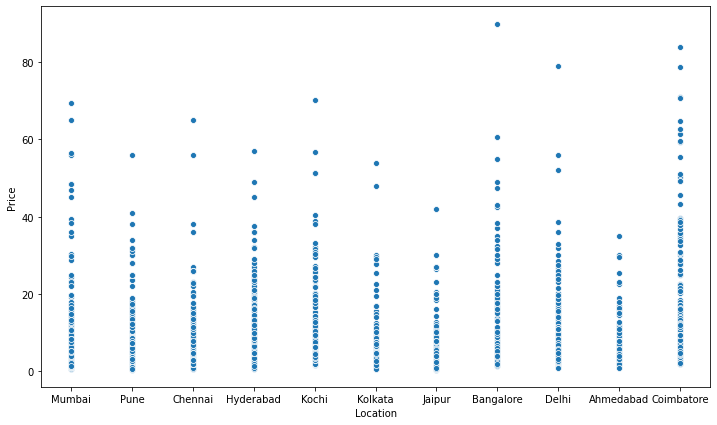

In [18]:
plt.figure(figsize=(12, 7))
sns.scatterplot(df['Location'], df['Price'])

In [19]:
df = pd.concat([df, pd.get_dummies(df['Location'], drop_first=True)], axis=1)

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
df.drop(['Name', 'Location'], axis=1, inplace=True)

In [22]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
df = df[(df['Owner_Type']=="First") | (df['Owner_Type']=="Second")]

In [24]:
df['Owner_Type'].value_counts()

First     3037
Second     547
Name: Owner_Type, dtype: int64

In [25]:
def check_owner_type(x):
    if x == "First":
        return 1
    else:
        return 0

df['Owner_Type'] = df['Owner_Type'].apply(check_owner_type)

In [26]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,2010,72000,CNG,Manual,1,26.6 km/kg,998 CC,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2011,46000,Petrol,Manual,1,18.2 kmpl,1199 CC,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0
5,2012,75000,LPG,Manual,1,21.1 km/kg,814 CC,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
df = pd.concat([df, pd.get_dummies(df['Fuel_Type'], drop_first=True)], axis=1)

In [28]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,2010,72000,CNG,Manual,1,26.6 km/kg,998 CC,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2011,46000,Petrol,Manual,1,18.2 kmpl,1199 CC,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,2012,75000,LPG,Manual,1,21.1 km/kg,814 CC,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [29]:
df.drop("Fuel_Type", axis=1, inplace=True)

In [30]:
def check_trans_type(trans):
    if trans == "Manual":
        return 1
    else:
        return 0

df['Transmission'] = df['Transmission'].apply(check_trans_type)

In [31]:
df.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,2010,72000,1,1,26.6 km/kg,998 CC,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,1,1,19.67 kmpl,1582 CC,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2011,46000,1,1,18.2 kmpl,1199 CC,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,87000,1,1,20.77 kmpl,1248 CC,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,2012,75000,1,1,21.1 km/kg,814 CC,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [32]:
# The "Mileage" is not well formated so no another choice but to drop it
df.drop("Mileage", axis=1, inplace=True)

In [33]:
df.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,2010,72000,1,1,998 CC,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,1,1,1582 CC,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2011,46000,1,1,1199 CC,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,87000,1,1,1248 CC,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,2012,75000,1,1,814 CC,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [34]:
df['Engine'] = df['Engine'].apply(lambda x: int(x.split()[0]))

In [35]:
df['Power'].apply(float)

0        58.16
1       126.20
2        88.70
3        88.76
5        55.20
         ...  
6012    102.00
6013     98.60
6014     74.00
6015     71.00
6017     67.10
Name: Power, Length: 3584, dtype: float64

In [36]:
df.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,2010,72000,1,1,998,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,1,1,1582,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2011,46000,1,1,1199,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,87000,1,1,1248,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,2012,75000,1,1,814,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [37]:
# Sweet, Everything is now numeric! let's make a quick check
df.dtypes

Year                   int64
Kilometers_Driven      int64
Transmission           int64
Owner_Type             int64
Engine                 int64
Power                float64
Seats                  int64
Price                float64
Hyundai                uint8
Maruti                 uint8
Mercedes-Benz          uint8
Toyota                 uint8
Bangalore              uint8
Chennai                uint8
Coimbatore             uint8
Delhi                  uint8
Hyderabad              uint8
Jaipur                 uint8
Kochi                  uint8
Kolkata                uint8
Mumbai                 uint8
Pune                   uint8
Diesel                 uint8
Electric               uint8
LPG                    uint8
Petrol                 uint8
dtype: object

# _Data View Clean_

In [38]:
df.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,2010,72000,1,1,998,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,1,1,1582,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2011,46000,1,1,1199,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,87000,1,1,1248,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,2012,75000,1,1,814,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


# **Deep Learning**

### Performing Train Test Split

In [39]:
X, y = df.drop("Price", axis=1).values, df['Price'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=101)

### Scaling The Data

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

### Creating The "Brain"

In [43]:
model = Sequential()

In [44]:
model.add(Dense(len(df.columns)-1, activation="relu"))

In [45]:
model.add(Dense(25, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dropout(0.25))

In [46]:
model.add(Dense(1))

In [47]:
model.compile(optimizer="adam", loss="mse")

### Fitting The Model To The Data

In [48]:
model.fit(x=X_train,
          y=y_train, 
          batch_size=32,
          epochs=1000,
          verbose=1,
          callbacks=[EarlyStopping(monitor="val_loss", 
                                   min_delta=0,
                                   patience=15, 
                                   verbose=0, 
                                   mode="min", )], 
          validation_split=0.0, 
          validation_data=(X_test, y_test))

Epoch 1/1000
90/90 [==============================] - 0s 3ms/step - loss: 94.9061 - val_loss: 41.7439
Epoch 2/1000
90/90 [==============================] - 0s 2ms/step - loss: 32.2331 - val_loss: 20.9680
Epoch 3/1000
90/90 [==============================] - 0s 2ms/step - loss: 24.8460 - val_loss: 17.0417
Epoch 4/1000
90/90 [==============================] - 0s 2ms/step - loss: 22.8640 - val_loss: 15.8589
Epoch 5/1000
90/90 [==============================] - 0s 2ms/step - loss: 20.3652 - val_loss: 14.3319
Epoch 6/1000
90/90 [==============================] - 0s 2ms/step - loss: 19.0992 - val_loss: 15.5440
Epoch 7/1000
90/90 [==============================] - 0s 2ms/step - loss: 15.9336 - val_loss: 10.9003
Epoch 8/1000
90/90 [==============================] - 0s 2ms/step - loss: 14.9796 - val_loss: 9.7283
Epoch 9/1000
90/90 [==============================] - 0s 2ms/step - loss: 13.0977 - val_loss: 8.9584
Epoch 10/1000
90/90 [==============================] - 0s 2ms/step - loss: 11.3485 -

### Prediction and Model Evaluations

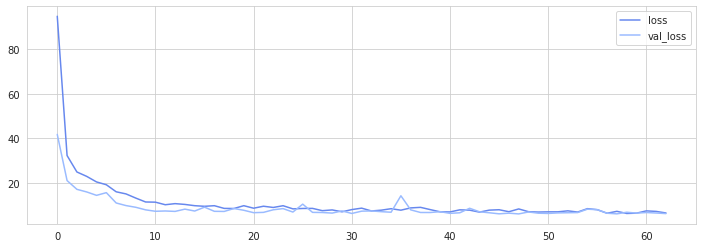

In [49]:
model_loss = pd.DataFrame(model.history.history)
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
model_loss.plot(figsize=(12, 4))

In [50]:
predictions = model.predict(X_test)

In [51]:
print(evs(y_test, predictions))

0.9198113060392736


In [52]:
print(mse(y_test, predictions))

6.125740378644464


In [53]:
print(mae(y_test, predictions))

1.323850015835782


In [54]:
print(np.sqrt(mse(y_test, predictions)))

2.4750233087073066


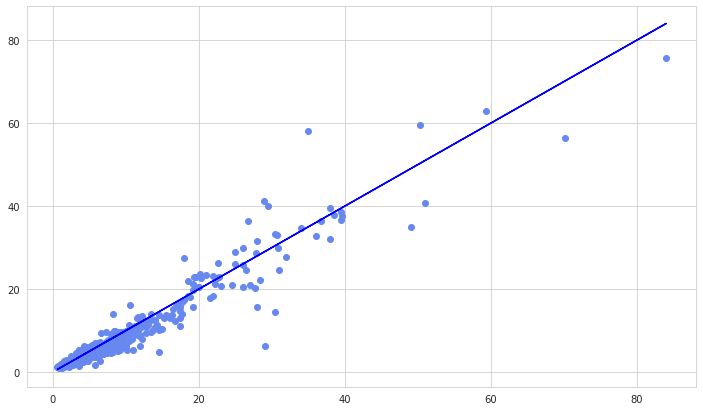

In [55]:
plt.figure(figsize=(12, 7))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'blue')

In [56]:
def predict_car_price(car, scaler=scaler, model=model):
    car = scaler.transform(car)
    return "Predicted Price Of The Car Would Be Around(Rupees): "+str(model.predict(car)[0][0])

In [57]:
car = df.iloc[12]
car = car.drop("Price")
car = car.values
car = car.reshape(-1, 25)

In [58]:
predict_car_price(car)

'Predicted Price Of The Car Would Be Around(Rupees): 6.460076'

# __Testing The Model By A Human__

In [59]:
df.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Engine,Power,Seats,Price,Hyundai,Maruti,Mercedes-Benz,Toyota,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,Electric,LPG,Petrol
0,2010,72000,1,1,998,58.16,5,1.75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,1,1,1582,126.20,5,12.50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,2011,46000,1,1,1199,88.70,5,4.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,87000,1,1,1248,88.76,7,6.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,2012,75000,1,1,814,55.20,5,2.35,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [60]:
car = np.array([[2006, 20000, 1, 1, 796.0, 40.3, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

In [61]:
predict_car_price(car)

'Predicted Price Of The Car Would Be Around(Rupees): 1.3022103'

In [74]:
car = np.array([[2020, 0, 1, 1, 1462.0, 103.26, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

In [75]:
predict_car_price(car)

'Predicted Price Of The Car Would Be Around(Rupees): 7.552226'

# *Saving The Model*

In [62]:
model.save("/content/drive/My Drive/Colab Notebooks/Deep Learning/Projects/6K Car Price Regression/model.h5")